# 0. Install and import required libraries

In [501]:
!pip install selenium
!pip install html5lib

In [128]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np
import time
import io

# 1. Web scraping and consolidation functions

**Scraping Function**

In [1020]:
def scrape_fbref_stats(url, table_index=2):
    """
    Scraps fbref urls defined as function input and brings table number 2 (expected 'Player Stats') as output

    Parameters:
    - url: link of the url to scrap
    - table_index: defined as a fixed number '2' as all pages seem to obbey to similar logic 
    
    Returns:
    - Dataframe with scraped table
    """
    
    # Set up headless browser
    options = Options()
    options.add_argument("--headless")
    driver = webdriver.Chrome(options=options)

    # Load the page
    driver.get(url)
    time.sleep(5)  # Wait for JavaScript to render

    # Get HTML content after rendering
    html = driver.page_source
    driver.quit()

    # Parse with pandas
    tables = pd.read_html(io.StringIO(html))
    df = tables[table_index]

    # Flatten multi-index headers properly
    df.columns = [
        f'{col[0]}_{col[1]}' if isinstance(col, tuple) and col[0] != col[1] and 'level' not in col[0]
        else col[1] if isinstance(col, tuple)
        else col
        for col in df.columns
]

    # Reset index
    df = df.reset_index(drop=True)

    # No truncation: keep full names
    df.columns = [str(col).strip() for col in df.columns]

    # Fill missing values and discart invalid rows
    df = df.fillna(0)
    df = df[df['Rk'] != 'Rk']

    # Simplify Nation field if it exists
    if 'Nation' in df.columns:
        df['Nation'] = df['Nation'].astype(str).str.split(' ').str.get(1)

    return df

**Player Aggregation Function**

In [1022]:
def join_player_tables(tables, league_name = None):
    """
    Joins a list of DataFrames on 'Rk' and 'Player' columns using inner join.

    Parameters:
    - tables: list of pandas DataFrames to be joined
    - league_name: optional string, added as a 'League' column

    Returns:
    - A single DataFrame resulting from joining all tables
    """
    if not tables:
        return pd.DataFrame()  # Return empty if list is empty

    # Start with the first table
    merged_df = tables[0]

    for i, df in enumerate(tables[1:], start=2):
        merged_df = pd.merge(merged_df, df, on=['Rk', 'Player'], how='inner', suffixes=('', f'_{i}'))

    # Add and move 'League' column to the front
    if league_name is not None:
        merged_df['League'] = league_name
        cols = ['League'] + [col for col in merged_df.columns if col != 'League']
        merged_df = merged_df[cols]
    
    return merged_df

# 2. National Leagues Web Scraping

## Austria

### AUS 1 - Standard Stats, Shooting and Miscellaneous

In [1026]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/56/stats/Austrian-Bundesliga-Stats"
aus1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/56/shooting/Austrian-Bundesliga-Stats"
aus1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/56/misc/Austrian-Bundesliga-Stats"
aus1_misc = scrape_fbref_stats(url3)

In [1027]:
# Aggregate data
aus1_agg = join_player_tables([aus1_stand, aus1_shooting, aus1_misc], 'aus1')

# Check number of columns and rows
print(aus1_stand.shape, aus1_shooting.shape, aus1_misc.shape)
aus1_agg.shape

(358, 25) (358, 20) (358, 21)


(358, 63)

## Belgium

### BEL 1 - Standard Stats, Shooting, Miscellaneous, Passing, Defensive and Possession

In [1030]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/37/stats/Belgian-Pro-League-Stats"
bel1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/37/shooting/Belgian-Pro-League-Stats"
bel1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/37/misc/Belgian-Pro-League-Stats"
bel1_misc = scrape_fbref_stats(url3)
# PASSING
url4= "https://fbref.com/en/comps/37/passing/Belgian-Pro-League-Stats"
bel1_pass = scrape_fbref_stats(url4)
# DEFENSIVE
url5 = "https://fbref.com/en/comps/37/defense/Belgian-Pro-League-Stats"
bel1_def= scrape_fbref_stats(url5)
# POSSESSION
url6 = "https://fbref.com/en/comps/37/possession/Belgian-Pro-League-Stats"
bel1_pos= scrape_fbref_stats(url6)

In [1031]:
# Aggregate data
bel1_agg = join_player_tables([bel1_stand, bel1_shooting, bel1_misc, bel1_pass, bel1_def, bel1_pos], 'bel1')

# Check number of columns and rows
print(bel1_stand.shape, bel1_shooting.shape, bel1_misc.shape, bel1_pass.shape, bel1_def.shape, bel1_pos.shape)
bel1_agg.shape

(486, 37) (486, 26) (486, 25) (486, 32) (486, 25) (486, 31)


(486, 167)

### BEL 2 - Standard Stats, Shooting and Miscellaneous

In [1033]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/69/stats/Challenger-Pro-League-Stats"
bel2_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/69/shooting/Challenger-Pro-League-Stats"
bel2_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/69/misc/Challenger-Pro-League-Stats"
bel2_misc = scrape_fbref_stats(url3)

In [1034]:
# Aggregate data
bel2_agg = join_player_tables([bel2_stand, bel2_shooting, bel2_misc], 'bel2')

# Check number of columns and rows
print(bel2_stand.shape, bel2_shooting.shape, bel2_misc.shape)
bel2_agg.shape

(459, 25) (459, 20) (459, 21)


(459, 63)

## Bulgaria

### BUL 1 - Standard Stats and Miscellaneous

In [1260]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/67/2024-2025/stats/2024-2025-Bulgarian-First-League-Stats"
bul1_stand = scrape_fbref_stats(url1)
# SHOOTING - NOT AVAILABLE
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/67/2024-2025/misc/2024-2025-Bulgarian-First-League-Stats"
bul1_misc = scrape_fbref_stats(url3)

In [1261]:
# Aggregate data
bul1_agg = join_player_tables([bul1_stand, bul1_misc], 'bul1')

# Check number of columns and rows
print(bul1_stand.shape, bul1_misc.shape)
bul1_agg.shape

(556, 25) (556, 21)


(556, 45)

## Croatia

### CRO 1 - Standard Stats, Shooting and Miscellaneous

In [1037]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/63/stats/Hrvatska-NL-Stats"
cro1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/63/shooting/Hrvatska-NL-Stats"
cro1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/63/misc/Hrvatska-NL-Stats"
cro1_misc = scrape_fbref_stats(url3)

In [1038]:
# Aggregate data
cro1_agg = join_player_tables([cro1_stand, cro1_shooting, cro1_misc], 'cro1')

# Check number of columns and rows
print(cro1_stand.shape, cro1_shooting.shape, cro1_misc.shape)
cro1_agg.shape

(346, 25) (346, 20) (346, 21)


(346, 63)

## Czech Republic

### CZE 1 - Standard Stats, Shooting and Miscellaneous

In [1041]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/66/2024-2025/stats/2024-2025-Czech-First-League-Stats"
cze1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/66/2024-2025/shooting/2024-2025-Czech-First-League-Stats"
cze1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/66/2024-2025/misc/2024-2025-Czech-First-League-Stats"
cze1_misc = scrape_fbref_stats(url3)

In [1042]:
# Aggregate data
cze1_agg = join_player_tables([cze1_stand, cze1_shooting, cze1_misc], 'cze1')

# Check number of columns and rows
print(cze1_stand.shape, cze1_shooting.shape, cze1_misc.shape)
cze1_agg.shape

(545, 25) (545, 20) (545, 21)


(545, 63)

## Denmark

### DEN 1 - Standard Stats, Shooting and Miscellaneous

In [1045]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/50/2024-2025/stats/2024-2025-Danish-Superliga-Stats"
den1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/50/2024-2025/shooting/2024-2025-Danish-Superliga-Stats"
den1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/50/2024-2025/misc/2024-2025-Danish-Superliga-Stats"
den1_misc = scrape_fbref_stats(url3)

In [1046]:
# Aggregate data
den1_agg = join_player_tables([den1_stand, den1_shooting, den1_misc], 'den1')

# Check number of columns and rows
print(den1_stand.shape, den1_shooting.shape, den1_misc.shape)
den1_agg.shape

(370, 25) (370, 20) (370, 21)


(370, 63)

## England

### ENG 1 - Standard Stats, Shooting, Miscellaneous, Passing, Defensive and Possession

In [1049]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/9/stats/Premier-League-Stats"
eng1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/9/shooting/Premier-League-Stats"
eng1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/9/misc/Premier-League-Stats"
eng1_misc = scrape_fbref_stats(url3)
# PASSING
url4= "https://fbref.com/en/comps/9/passing/Premier-League-Stats"
eng1_pass = scrape_fbref_stats(url4)
# DEFENSIVE
url5 = "https://fbref.com/en/comps/9/defense/Premier-League-Stats"
eng1_def= scrape_fbref_stats(url5)
# POSSESSION
url6 = "https://fbref.com/en/comps/9/possession/Premier-League-Stats"
eng1_pos= scrape_fbref_stats(url6)

In [1050]:
# Aggregate data
eng1_agg = join_player_tables([eng1_stand, eng1_shooting, eng1_misc, eng1_pass, eng1_def, eng1_pos], 'eng1')

# Check number of columns and rows
print(eng1_stand.shape, eng1_shooting.shape, eng1_misc.shape, eng1_pass.shape, eng1_def.shape, eng1_pos.shape)
eng1_agg.shape

(574, 37) (574, 26) (574, 25) (574, 32) (574, 25) (574, 31)


(574, 167)

### ENG 2 - Standard Stats, Shooting, Miscellaneous, Passing, Defensive and Possession

In [1052]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/10/stats/Championship-Stats"
eng2_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/10/shooting/Championship-Stats"
eng2_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/10/misc/Championship-Stats"
eng2_misc = scrape_fbref_stats(url3)
# PASSING
url4= "https://fbref.com/en/comps/10/passing/Championship-Stats"
eng2_pass = scrape_fbref_stats(url4)
# DEFENSIVE
url5 = "https://fbref.com/en/comps/10/defense/Championship-Stats"
eng2_def= scrape_fbref_stats(url5)
# POSSESSION
url6 = "https://fbref.com/en/comps/10/possession/Championship-Stats"
eng2_pos= scrape_fbref_stats(url6)

In [1053]:
# Aggregate data
eng2_agg = join_player_tables([eng2_stand, eng2_shooting, eng2_misc, eng2_pass, eng2_def, eng2_pos], 'eng2')

# Check number of columns and rows
print(eng2_stand.shape, eng2_shooting.shape, eng2_misc.shape, eng2_pass.shape, eng2_def.shape, eng2_pos.shape)
eng2_agg.shape

(765, 37) (765, 26) (765, 25) (765, 32) (765, 25) (765, 31)


(765, 167)

### ENG 3 - Standard Stats, Shooting and Miscellaneous

In [1055]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/15/stats/League-One-Stats"
eng3_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/15/shooting/League-One-Stats"
eng3_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/15/misc/League-One-Stats"
eng3_misc = scrape_fbref_stats(url3)

In [1056]:
# Aggregate data
eng3_agg = join_player_tables([eng3_stand, eng3_shooting, eng3_misc], 'eng3')

# Check number of columns and rows
print(eng3_stand.shape, eng3_shooting.shape, eng3_misc.shape)
eng3_agg.shape

(785, 25) (785, 20) (785, 21)


(785, 63)

## Finland

### FIN 1 - Standard Stats, Shooting and Miscellaneous

In [1264]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/43/stats/Veikkausliiga-Stats"
fin1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/43/shooting/Veikkausliiga-Stats"
fin1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/43/misc/Veikkausliiga-Stats"
fin1_misc = scrape_fbref_stats(url3)

In [1266]:
# Aggregate data
fin1_agg = join_player_tables([fin1_stand, fin1_shooting, fin1_misc], 'fin1')

# Check number of columns and rows
print(fin1_stand.shape, fin1_shooting.shape, fin1_misc.shape)
fin1_agg.shape

(296, 25) (296, 20) (296, 21)


(296, 63)

## France

### FRA 1 - Standard Stats, Shooting, Miscellaneous, Passing, Defensive and Possession

In [1059]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/13/stats/Ligue-1-Stats"
fra1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/13/shooting/Ligue-1-Stats"
fra1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/13/misc/Ligue-1-Stats"
fra1_misc = scrape_fbref_stats(url3)
# PASSING
url4= "https://fbref.com/en/comps/13/passing/Ligue-1-Stats"
fra1_pass = scrape_fbref_stats(url4)
# DEFENSIVE
url5 = "https://fbref.com/en/comps/13/defense/Ligue-1-Stats"
fra1_def= scrape_fbref_stats(url5)
# POSSESSION
url6 = "https://fbref.com/en/comps/13/possession/Ligue-1-Stats"
fra1_pos= scrape_fbref_stats(url6)

In [1060]:
# Aggregate data
fra1_agg = join_player_tables([fra1_stand, fra1_shooting, fra1_misc, fra1_pass, fra1_def, fra1_pos], 'fra1')

# Check number of columns and rows
print(fra1_stand.shape, fra1_shooting.shape, fra1_misc.shape, fra1_pass.shape, fra1_def.shape, fra1_pos.shape)
fra1_agg.shape

(553, 37) (553, 26) (553, 25) (553, 32) (553, 25) (553, 31)


(553, 167)

### FRA 2 - Standard Stats, Shooting and Miscellaneous

In [1062]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/60/stats/Ligue-2-Stats"
fra2_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/60/shooting/Ligue-2-Stats"
fra2_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/60/misc/Ligue-2-Stats"
fra2_misc = scrape_fbref_stats(url3)

In [1063]:
# Aggregate data
fra2_agg = join_player_tables([fra2_stand, fra2_shooting, fra2_misc], 'fra2')

# Check number of columns and rows
print(fra2_stand.shape, fra2_shooting.shape, fra2_misc.shape)
fra2_agg.shape

(528, 25) (528, 20) (528, 21)


(528, 63)

## Germany

### GER 1 - Standard Stats, Shooting, Miscellaneous, Passing, Defensive and Possession

In [1066]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/20/stats/Bundesliga-Stats"
ger1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/20/shooting/Bundesliga-Stats"
ger1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/20/misc/Bundesliga-Stats"
ger1_misc = scrape_fbref_stats(url3)
# PASSING
url4= "https://fbref.com/en/comps/20/passing/Bundesliga-Stats"
ger1_pass = scrape_fbref_stats(url4)
# DEFENSIVE
url5 = "https://fbref.com/en/comps/20/defense/Bundesliga-Stats"
ger1_def= scrape_fbref_stats(url5)
# POSSESSION
url6 = "https://fbref.com/en/comps/20/possession/Bundesliga-Stats"
ger1_pos= scrape_fbref_stats(url6)

In [1067]:
# Aggregate data
ger1_agg = join_player_tables([ger1_stand, ger1_shooting, ger1_misc, ger1_pass, ger1_def, ger1_pos], 'ger1')

# Check number of columns and rows
print(ger1_stand.shape, ger1_shooting.shape, ger1_misc.shape, ger1_pass.shape, ger1_def.shape, ger1_pos.shape)
ger1_agg.shape

(492, 37) (492, 26) (492, 25) (492, 32) (492, 25) (492, 31)


(492, 167)

### GER 2 - Standard Stats, Shooting and Miscellaneous

In [1069]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/33/stats/2-Bundesliga-Stats"
ger2_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/33/shooting/2-Bundesliga-Stats"
ger2_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/33/misc/2-Bundesliga-Stats"
ger2_misc = scrape_fbref_stats(url3)

In [1070]:
# Aggregate data
ger2_agg = join_player_tables([ger2_stand, ger2_shooting, ger2_misc], 'ger2')

# Check number of columns and rows
print(ger2_stand.shape, ger2_shooting.shape, ger2_misc.shape)
ger2_agg.shape

(536, 25) (536, 20) (536, 21)


(536, 63)

### GER 3 - Standard Stats and Miscellaneous

In [1072]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/59/stats/3-Liga-Stats"
ger3_stand = scrape_fbref_stats(url1)
# SHOOTING - NOT AVAILABLE
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/59/misc/3-Liga-Stats"
ger3_misc = scrape_fbref_stats(url3)

In [1073]:
# Aggregate data
ger3_agg = join_player_tables([ger3_stand, ger3_misc], 'ger3')

# Check number of columns and rows
print(ger3_stand.shape, ger3_misc.shape)
ger3_agg.shape

(602, 25) (602, 21)


(602, 45)

## Greece

### GRE 1 - Standard Stats and Miscellaneous

In [1076]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/27/stats/Super-League-Greece-Stats"
gre1_stand = scrape_fbref_stats(url1)
# SHOOTING - NOT AVAILABLE
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/27/misc/Super-League-Greece-Stats"
gre1_misc = scrape_fbref_stats(url3)

In [1077]:
# Aggregate data
gre1_agg = join_player_tables([gre1_stand, gre1_misc], 'gre1')

# Check number of columns and rows
print(gre1_stand.shape, gre1_misc.shape)
gre1_agg.shape

(446, 25) (446, 21)


(446, 45)

## Hungary

### HUN 1 - Standard Stats, Shooting and Miscellaneous

In [1236]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/46/2024-2025/stats/2024-2025-NB-I-Stats"
hun1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/46/2024-2025/shooting/2024-2025-NB-I-Stats"
hun1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/46/2024-2025/misc/2024-2025-NB-I-Stats"
hun1_misc = scrape_fbref_stats(url3)

In [1237]:
# Aggregate data
hun1_agg = join_player_tables([hun1_stand, hun1_shooting, hun1_misc], 'hun1')

# Check number of columns and rows
print(hun1_stand.shape, hun1_shooting.shape, hun1_misc.shape)
hun1_agg.shape

(388, 25) (388, 20) (388, 21)


(388, 63)

## Italy

### ITA 1 - Standard Stats, Shooting, Miscellaneous, Passing, Defensive and Possession

In [1080]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/11/stats/Serie-A-Stats"
ita1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/11/shooting/Serie-A-Stats"
ita1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/11/misc/Serie-A-Stats"
ita1_misc = scrape_fbref_stats(url3)
# PASSING
url4= "https://fbref.com/en/comps/11/passing/Serie-A-Stats"
ita1_pass = scrape_fbref_stats(url4)
# DEFENSIVE
url5 = "https://fbref.com/en/comps/11/defense/Serie-A-Stats"
ita1_def= scrape_fbref_stats(url5)
# POSSESSION
url6 = "https://fbref.com/en/comps/11/possession/Serie-A-Stats"
ita1_pos= scrape_fbref_stats(url6)

In [1081]:
# Aggregate data
ita1_agg = join_player_tables([ita1_stand, ita1_shooting, ita1_misc, ita1_pass, ita1_def, ita1_pos], 'ita1')

# Check number of columns and rows
print(ita1_stand.shape, ita1_shooting.shape, ita1_misc.shape, ita1_pass.shape, ita1_def.shape, ita1_pos.shape)
ita1_agg.shape

(634, 37) (634, 26) (634, 25) (634, 32) (634, 25) (634, 31)


(634, 167)

### ITA 2 - Standard Stats, Shooting, Miscellaneous, Passing, Defensive and Possession

In [1083]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/18/stats/Serie-B-Stats"
ita2_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/18/shooting/Serie-B-Stats"
ita2_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/18/misc/Serie-B-Stats"
ita2_misc = scrape_fbref_stats(url3)
# PASSING
url4= "https://fbref.com/en/comps/18/passing/Serie-B-Stats"
ita2_pass = scrape_fbref_stats(url4)
# DEFENSIVE
url5 = "https://fbref.com/en/comps/18/defense/Serie-B-Stats"
ita2_def= scrape_fbref_stats(url5)
# POSSESSION
url6 = "https://fbref.com/en/comps/18/possession/Serie-B-Stats"
ita2_pos= scrape_fbref_stats(url6)

In [1084]:
# Aggregate data
ita2_agg = join_player_tables([ita2_stand, ita2_shooting, ita2_misc, ita2_pass, ita2_def, ita2_pos], 'ita2')

# Check number of columns and rows
print(ita2_stand.shape, ita2_shooting.shape, ita2_misc.shape, ita2_pass.shape, ita2_def.shape, ita2_pos.shape)
ita2_agg.shape

(625, 37) (625, 26) (625, 25) (625, 32) (625, 25) (625, 31)


(625, 167)

## Netherlands

### HOL 1 - Standard Stats, Shooting, Miscellaneous, Passing, Defensive and Possession

In [1087]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/23/stats/Eredivisie-Stats"
hol1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/23/shooting/Eredivisie-Stats"
hol1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/23/misc/Eredivisie-Stats"
hol1_misc = scrape_fbref_stats(url3)
# PASSING
url4= "https://fbref.com/en/comps/23/passing/Eredivisie-Stats"
hol1_pass = scrape_fbref_stats(url4)
# DEFENSIVE
url5 = "https://fbref.com/en/comps/23/defense/Eredivisie-Stats"
hol1_def= scrape_fbref_stats(url5)
# POSSESSION
url6 = "https://fbref.com/en/comps/23/possession/Eredivisie-Stats"
hol1_pos= scrape_fbref_stats(url6)

In [1088]:
# Aggregate data
hol1_agg = join_player_tables([hol1_stand, hol1_shooting, hol1_misc, hol1_pass, hol1_def, hol1_pos], 'hol1')

# Check number of columns and rows
print(hol1_stand.shape, hol1_shooting.shape, hol1_misc.shape, hol1_pass.shape, hol1_def.shape, hol1_pos.shape)
hol1_agg.shape

(534, 37) (534, 26) (534, 25) (534, 32) (534, 25) (534, 31)


(534, 167)

### HOL 2 - Standard Stats, Shooting and Miscellaneous

In [1090]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/51/stats/Eerste-Divisie-Stats"
hol2_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/51/shooting/Eerste-Divisie-Stats"
hol2_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/51/misc/Eerste-Divisie-Stats"
hol2_misc = scrape_fbref_stats(url3)

In [1091]:
# Aggregate data
hol2_agg = join_player_tables([hol2_stand, hol2_shooting, hol2_misc], 'hol2')

# Check number of columns and rows
print(hol2_stand.shape, hol2_shooting.shape, hol2_misc.shape)
hol2_agg.shape

(665, 25) (665, 20) (665, 21)


(665, 63)

## Norway

### NOR 1 - Ongoing | Standard Stats, Shooting and Miscellaneous

In [1094]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/28/stats/Eliteserien-Stats"
nor1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/28/shooting/Eliteserien-Stats"
nor1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/28/misc/Eliteserien-Stats"
nor1_misc = scrape_fbref_stats(url3)

In [1095]:
# Aggregate data
nor1_agg = join_player_tables([nor1_stand, nor1_shooting, nor1_misc], 'nor1')

# Check number of columns and rows
print(nor1_stand.shape, nor1_shooting.shape, nor1_misc.shape)
nor1_agg.shape

(368, 25) (368, 20) (368, 21)


(368, 63)

## Poland

### POL 1 - Standard Stats, Shooting and Miscellaneous

In [1098]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/36/2024-2025/stats/2024-2025-Ekstraklasa-Stats"
pol1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/36/2024-2025/shooting/2024-2025-Ekstraklasa-Stats"
pol1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/36/2024-2025/misc/2024-2025-Ekstraklasa-Stats"
pol1_misc = scrape_fbref_stats(url3)

In [1099]:
# Aggregate data
pol1_agg = join_player_tables([pol1_stand, pol1_shooting, pol1_misc], 'pol1')

# Check number of columns and rows
print(pol1_stand.shape, pol1_shooting.shape, pol1_misc.shape)
pol1_agg.shape

(552, 25) (552, 20) (552, 21)


(552, 63)

## Portugal

### POR 1 - Standard Stats, Shooting, Miscellaneous, Passing, Defensive and Possession

In [1102]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/32/stats/Primeira-Liga-Stats"
por1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/32/shooting/Primeira-Liga-Stats"
por1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/32/misc/Primeira-Liga-Stats"
por1_misc = scrape_fbref_stats(url3)
# PASSING
url4= "https://fbref.com/en/comps/32/passing/Primeira-Liga-Stats"
por1_pass = scrape_fbref_stats(url4)
# DEFENSIVE
url5 = "https://fbref.com/en/comps/32/defense/Primeira-Liga-Stats"
por1_def= scrape_fbref_stats(url5)
# POSSESSION
url6 = "https://fbref.com/en/comps/32/possession/Primeira-Liga-Stats"
por1_pos= scrape_fbref_stats(url6)

In [1103]:
# Aggregate data
por1_agg = join_player_tables([por1_stand, por1_shooting, por1_misc, por1_pass, por1_def, por1_pos], 'por1')

# Check number of columns and rows
print(por1_stand.shape, por1_shooting.shape, por1_misc.shape, por1_pass.shape, por1_def.shape, por1_pos.shape)
por1_agg.shape

(585, 37) (585, 26) (585, 25) (585, 32) (585, 25) (585, 31)


(585, 167)

## Romania

### ROM 1 - Standard Stats, Shooting and Miscellaneous

In [1230]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/47/2024-2025/stats/2024-2025-Liga-I-Stats"
rom1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/47/2024-2025/shooting/2024-2025-Liga-I-Stats"
rom1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/47/2024-2025/misc/2024-2025-Liga-I-Stats"
rom1_misc = scrape_fbref_stats(url3)

In [1231]:
# Aggregate data
rom1_agg = join_player_tables([rom1_stand, rom1_shooting, rom1_misc], 'rom1')

# Check number of columns and rows
print(rom1_stand.shape, rom1_shooting.shape, rom1_misc.shape)
rom1_agg.shape

(574, 25) (574, 20) (574, 21)


(574, 63)

## Russia

### RUS 1 - Standard Stats, Shooting and Miscellaneous

In [1269]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/30/2024-2025/stats/2024-2025-Russian-Premier-League-Stats"
rus1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/30/2024-2025/shooting/2024-2025-Russian-Premier-League-Stats"
rus1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/30/2024-2025/misc/2024-2025-Russian-Premier-League-Stats"
rus1_misc = scrape_fbref_stats(url3)

In [1270]:
# Aggregate data
rus1_agg = join_player_tables([rus1_stand, rus1_shooting, rus1_misc], 'rus1')

# Check number of columns and rows
print(rus1_stand.shape, rus1_shooting.shape, rus1_misc.shape)
rus1_agg.shape

(477, 25) (477, 20) (477, 21)


(477, 63)

## Scotland

### SCO 1 - Standard Stats, Shooting and Miscellaneous

In [1106]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/40/stats/Scottish-Premiership-Stats"
sco1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/40/shooting/Scottish-Premiership-Stats"
sco1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/40/misc/Scottish-Premiership-Stats"
sco1_misc = scrape_fbref_stats(url3)

In [1107]:
# Aggregate data
sco1_agg = join_player_tables([sco1_stand, sco1_shooting, sco1_misc], 'sco1')

# Check number of columns and rows
print(sco1_stand.shape, sco1_shooting.shape, sco1_misc.shape)
sco1_agg.shape

(372, 25) (372, 20) (372, 21)


(372, 63)

## Serbia

### SER 1 - Standard Stats, Shooting and Miscellaneous

In [1110]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/54/2024-2025/stats/2024-2025-Serbian-SuperLiga-Stats"
ser1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/54/2024-2025/shooting/2024-2025-Serbian-SuperLiga-Stats"
ser1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/54/2024-2025/misc/2024-2025-Serbian-SuperLiga-Stats"
ser1_misc = scrape_fbref_stats(url3)

In [1111]:
# Aggregate data
ser1_agg = join_player_tables([ser1_stand, ser1_shooting, ser1_misc], 'ser1')

# Check number of columns and rows
print(ser1_stand.shape, ser1_shooting.shape, ser1_misc.shape)
ser1_agg.shape

(579, 25) (579, 20) (579, 21)


(579, 63)

## Spain

### SPA 1 - Standard Stats, Shooting, Miscellaneous, Passing, Defensive and Possession

In [1114]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/12/stats/La-Liga-Stats"
spa1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/12/shooting/La-Liga-Stats"
spa1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/12/misc/La-Liga-Stats"
spa1_misc = scrape_fbref_stats(url3)
# PASSING
url4= "https://fbref.com/en/comps/12/passing/La-Liga-Stats"
spa1_pass = scrape_fbref_stats(url4)
# DEFENSIVE
url5 = "https://fbref.com/en/comps/12/defense/La-Liga-Stats"
spa1_def= scrape_fbref_stats(url5)
# POSSESSION
url6 = "https://fbref.com/en/comps/12/possession/La-Liga-Stats"
spa1_pos= scrape_fbref_stats(url6)

In [1115]:
# Aggregate data
spa1_agg = join_player_tables([spa1_stand, spa1_shooting, spa1_misc, spa1_pass, spa1_def, spa1_pos], 'spa1')

# Check number of columns and rows
print(spa1_stand.shape, spa1_shooting.shape, spa1_misc.shape, spa1_pass.shape, spa1_def.shape, spa1_pos.shape)
spa1_agg.shape

(601, 37) (601, 26) (601, 25) (601, 32) (601, 25) (601, 31)


(601, 167)

### SPA 2 - Standard Stats, Shooting and Miscellaneous

In [1117]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/17/stats/Segunda-Division-Stats"
spa2_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/17/shooting/Segunda-Division-Stats"
spa2_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/17/misc/Segunda-Division-Stats"
spa2_misc = scrape_fbref_stats(url3)

In [1118]:
# Aggregate data
spa2_agg = join_player_tables([spa2_stand, spa2_shooting, spa2_misc], 'spa2')

# Check number of columns and rows
print(spa2_stand.shape, spa2_shooting.shape, spa2_misc.shape)
spa2_agg.shape

(680, 25) (680, 20) (680, 21)


(680, 63)

## Sweden

### SWE 1 | Ongoing - Standard Stats, Shooting and Miscellaneous

In [1121]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/29/stats/Allsvenskan-Stats"
swe1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/29/shooting/Allsvenskan-Stats"
swe1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/29/misc/Allsvenskan-Stats"
swe1_misc = scrape_fbref_stats(url3)

In [1122]:
# Aggregate data
swe1_agg = join_player_tables([swe1_stand, swe1_shooting, swe1_misc], 'swe1')

# Check number of columns and rows
print(swe1_stand.shape, swe1_shooting.shape, swe1_misc.shape)
swe1_agg.shape

(394, 25) (394, 20) (394, 21)


(394, 63)

## Switzerland

### SUI 1 - Standard Stats, Shooting and Miscellaneous

In [1125]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/57/2024-2025/stats/2024-2025-Swiss-Super-League-Stats"
swi1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/57/2024-2025/shooting/2024-2025-Swiss-Super-League-Stats"
swi1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/57/2024-2025/misc/2024-2025-Swiss-Super-League-Stats"
swi1_misc = scrape_fbref_stats(url3)

In [1126]:
# Aggregate data
swi1_agg = join_player_tables([swi1_stand, swi1_shooting, swi1_misc], 'swi1')

# Check number of columns and rows
print(swi1_stand.shape, swi1_shooting.shape, swi1_misc.shape)
swi1_agg.shape

(380, 25) (380, 20) (380, 21)


(380, 63)

## Turkey

### TUR 1 - Standard Stats, Shooting and Miscellaneous

In [1129]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/26/stats/Super-Lig-Stats"
tur1_stand = scrape_fbref_stats(url1)
# SHOOTING
url2 = "https://fbref.com/en/comps/26/shooting/Super-Lig-Stats"
tur1_shooting = scrape_fbref_stats(url2)
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/26/misc/Super-Lig-Stats"
tur1_misc = scrape_fbref_stats(url3)

In [1130]:
# Aggregate data
tur1_agg = join_player_tables([tur1_stand, tur1_shooting, tur1_misc], 'tur1')

# Check number of columns and rows
print(tur1_stand.shape, tur1_shooting.shape, tur1_misc.shape)
tur1_agg.shape

(598, 25) (598, 20) (598, 21)


(598, 63)

## Ukraine

### UKR 1 - Standard Stats and Miscellaneous

In [1273]:
# STANDARD STATS
url1 = "https://fbref.com/en/comps/39/stats/Ukrainian-Premier-League-Stats"
ukr1_stand = scrape_fbref_stats(url1)
# SHOOTING - NOT AVAILABLE
# MISCELLANEOUS
url3 = "https://fbref.com/en/comps/39/misc/Ukrainian-Premier-League-Stats"
ukr1_misc = scrape_fbref_stats(url3)

In [1274]:
# Aggregate data
ukr1_agg = join_player_tables([ukr1_stand, ukr1_misc], 'ukr1')

# Check number of columns and rows
print(ukr1_stand.shape, ukr1_misc.shape)
ukr1_agg.shape

(521, 25) (521, 21)


(521, 45)

# 3. All Leagues Consolidation and Data Cleaning

In [82]:
def standardize_and_concat(dfs, fill_value='-'):
    """
    Standardizes column sets across multiple DataFrames and concatenates them. Additionally, it performs some data cleaning.

    Parameters:
    - dfs: list of pandas DataFrames
    - fill_value: value used to fill missing columns (default: '-')

    Returns:
    - A single concatenated DataFrame with aligned and ordered columns
    """
    # Step 1: Get full set of all column names across all dataframes
    all_columns = set()
    for df in dfs:
        all_columns.update(df.columns)

    # Step 2: Determine desired column order:
    # Start with columns from the first dataframe
    base_order = list(dfs[0].columns)
    # Append any new columns from others (not in the first one)
    extra_columns = [col for col in all_columns if col not in base_order]
    final_columns = base_order + sorted(extra_columns)

    # Step 3: Reindex each dataframe to have all columns (fill missing with '-')
    standardized_dfs = [df.reindex(columns=all_columns, fill_value=fill_value) for df in dfs]

    # Step 4: Concatenate all dataframes
    combined_df = pd.concat(standardized_dfs, ignore_index=True)

    # Step 5: Add all missing columns (if any) in one go
    missing_cols = [col for col in final_columns if col not in combined_df.columns]
    if missing_cols:
        missing_df = pd.DataFrame({col: fill_value for col in missing_cols}, index=combined_df.index)
        combined_df = pd.concat([combined_df, missing_df], axis=1)

    # Step 6: Reorder columns
    combined_df = combined_df[final_columns]

    return combined_df


In [84]:
all_leagues = [eng1_agg, aus1_agg, bel1_agg, bel2_agg, bul1_agg, cro1_agg, cze1_agg, 
               den1_agg, eng2_agg, eng3_agg, fin1_agg, fra1_agg, fra2_agg, ger1_agg, 
               ger2_agg, ger3_agg, gre1_agg, hun1_agg, ita1_agg, ita2_agg, hol1_agg, 
               hol2_agg, nor1_agg, pol1_agg, por1_agg, rom1_agg, rus1_agg, sco1_agg, 
               ser1_agg, spa1_agg, spa2_agg, swe1_agg, swi1_agg, tur1_agg, ukr1_agg]

NameError: name 'eng1_agg' is not defined

In [1281]:
df_complete = standardize_and_concat(all_leagues)
df_complete.shape

(18224, 169)

In [1283]:
cols_to_drop = ['Nation_2','Pos_2','Squad_2','Age_2','Born_2','Matches_2',
                'Nation_3','Pos_3','Squad_3','Age_3','Born_3','Matches_3',
                'Nation_4','Pos_4','Squad_4','Age_4','Born_4','Matches_4',
                'Nation_5','Pos_5','Squad_5','Age_5','Born_5','Matches_5',
                'Nation_6','Pos_6','Squad_6','Age_6','Born_6','Matches_6',
                '90s_3','90s_4','90s_5','90s_6',
                'Rk','Matches','Expected_xG_2','Expected_npxG_2',
                'Performance_CrdR_2','Performance_CrdY_2',
                'Performance_CrdY_3','Performance_CrdR_3']
df_complete.drop(columns=cols_to_drop, inplace = True)
df_complete.shape

(18224, 127)

In [1285]:
df_complete.to_excel(r"C:\Users\pedro\OneDrive\Escritorio\Projetos\Football Scout/df_complete.xlsx", index=False)

In [164]:
path = r"C:\Users\pedro\OneDrive\Escritorio\Projetos\Football Scout\df_complete.xlsx"
df_complete = pd.read_excel(path)

In [167]:
pd.set_option('display.max_columns', None)
df_complete.head(5)

,League,Player,Nation,Pos,Squad,Age,Born,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Expected_xG,Expected_npxG,Expected_xAG,Expected_npxG+xAG,Progression_PrgC,Progression_PrgP,Progression_PrgR,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG,90s,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_FK,Standard_PK,Standard_PKatt,Expected_npxG/Sh,Expected_G-xG,Expected_np:G-xG,Performance_2CrdY,Performance_Fls,Performance_Fld,Performance_Off,Performance_Crs,Performance_Int,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,Medium_Cmp,Medium_Att,Medium_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,Ast,xAG,Expected_xA,Expected_A-xAG,KP,1/3,PPA,CrsPA,PrgP,Tackles_Tkl,Tackles_TklW,Tackles_Def 3rd,Tackles_Mid 3rd,Tackles_Att 3rd,Challenges_Tkl,Challenges_Att,Challenges_Tkl%,Challenges_Lost,Blocks,Blocks_Sh,Blocks_Pass,Int,Tkl+Int,Clr,Err,Touches,Touches_Def Pen,Touches_Def 3rd,Touches_Mid 3rd,Touches_Att 3rd,Touches_Att Pen,Touches_Live,Take-Ons_Att,Take-Ons_Succ,Take-Ons_Succ%,Take-Ons_Tkld,Take-Ons_Tkld%,Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR
0,eng1,Max Aarons,ENG,DF,Bournemouth,24,2000,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0,0,0,0,0.00,0.00,0,0,0,0,0,0,0,0.0,0.0,0,0,2,0,2,1,2,0,0,0,7,0,0,0,50,63,79.4,887,361,21,25,84.0,24,29,82.8,4,7,57.1,0,0.0,0.0,0.0,0,8,0,0,8,2,2,1,1,0,1,1,100.0,0,3,1,2,1,3,0,0,73,2,19,40,15,0,73,2,0,0.0,1,50.0,41,152,68,1,0,0,1,0,40,3
1,eng1,Joshua Acheampong,ENG,DF,Chelsea,18,2006,4,2,170,1.9,0,0,0,0,0,0,1,0,0.2,0.2,0.0,0.2,0,8,0,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12,1.9,0,2,0,0.0,1.06,0.00,0.00,0,8.9,0,0,0,0.11,-0.2,-0.2,0,0,1,0,0,1,1,0,0,0,7,1,6,14.3,104,124,83.9,2025,705,29,32,90.6,63,68,92.6,11,20,55.0,0,0.0,0.0,0.0,0,6,0,0,8,2,1,2,0,0,2,2,100.0,0,1,0,1,1,3,2,0,137,7,48,81,8,3,137,2,1,50.0,0,0.0,106,709,409,0,2,0,2,0,111,0
2,eng1,Tyler Adams,USA,MF,Bournemouth,25,1999,28,21,1965,21.8,0,3,3,0,0,0,7,0,1.6,1.6,1.0,2.6,14,76,10,0.00,0.14,0.14,0.00,0.14,0.07,0.05,0.12,0.07,0.12,21.8,0,9,2,22.2,0.41,0.09,0.00,0.00,16.9,0,0,0,0.18,-1.6,-1.6,0,45,21,0,3,32,50,0,1,0,114,31,18,63.3,902,1069,84.4,14322,3525,437,489,89.4,393,443,88.7,38,65,58.5,3,1.0,0.8,+2.0,18,67,4,1,76,83,50,26,49,8,39,72,54.2,33,33,10,23,32,115,42,0,1337,62,349,779,224,18,1337,18,4,22.2,10,55.6,663,3337,1447,14,22,1,28,12,757,10
3,eng1,Tosin Adarabioyo,ENG,DF,Chelsea,26,1997,22,15,1409,15.7,1,1,2,1,0,0,4,0,0.9,0.9,0.2,1.2,5,42,1,0.06,0.06,0.13,0.06,0.13,0.06,0.01,0.07,0.06,0.07,15.7,1,13,2,15.4,0.83,0.13,0.08,0.50,12.5,0,0,0,0.07,+0.1,+0.1,0,8,9,1,0,11,13,0,0,0,41,42,28,60.0,1079,1184,91.1,19805,7144,406,425,95.5,603,636,94.8,66,109,60.6,1,0.2,0.2,+0.8,1,62,1,0,42,17,13,11,6,0,8,12,66.7,4,9,7,2,11,28,80,0,1330,175,630,674,27,14,1330,6,4,66.7,1,16.7,777,3207,1809,5,2,0,4,0,1000,1
4,eng1,Simon Adingra,CIV,"FW,MF",Brighton,22,2002,29,12,1097,12.2,2,2,4,2,0,0,0,0,2.5,2.5,2.5,4.9,50,18,136,0.16,0.16,0.33,0.16,0.33,0.20,0.20,0.40,0.20,0.40,12.2,2,33,8,24.2,2.71,0.66,0.06,0.25,17.0,0,0,0,0.07,-0.5,-0.5,0,13,4,4,41,8,14,0,0,0,47,7,4,63.6,290,382,75.9,4148,820,187,217,86.2,81,109,74.3,16,29,55.2,2,2.5,2.8,-0.5,16,5,17,6,18,23,14,10,8,5,10,26,38.5,16,12,0,12,8,31,6,2,548,10,66,174,315,76,548,50,21,42.0,27,54.0,366,2514,1300,50,21,27,39,12,388,136


In [169]:
def data_cleaning (df):
    """
    Cleans dataframe data

    Parameter: dataframe to be cleaned

    Returns: a single cleaned dataframe
    """
    print("Before Cleaning:")
    df.info()
    
    # Step 1: Clean 'Age' data that is in wrong format
    df['Age'] = df['Age'].astype(str).str.extract(r'^(\d+)')

    
    # Step 2: Replace problematic symbols (like '-') with np.nan
    df.replace('-', np.nan, inplace=True)

    # Step 3: Convert all object columns to float where possible
    for col in df.select_dtypes(include='object').columns:
        try:
            df[col] = df[col].astype(float)
        except ValueError:
            pass  # Skip columns that still can't be convertedç

    print("\n------------------------------\n")
    print("After cleaning:")
    df.info()

    print("\n------------------------------\n")
    print("Object type columns:")
    print(df.select_dtypes(include='object').columns.tolist())
    
    return df

In [171]:
df_cleaned = data_cleaning (df_complete)

Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18224 entries, 0 to 18223
Columns: 127 entries, League to Receiving_PrgR
dtypes: float64(7), int64(22), object(98)
memory usage: 17.7+ MB

------------------------------

After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18224 entries, 0 to 18223
Columns: 127 entries, League to Receiving_PrgR
dtypes: float64(100), int64(22), object(5)
memory usage: 17.7+ MB

------------------------------

Object type columns:
['League', 'Player', 'Nation', 'Pos', 'Squad']


In [173]:
df_cleaned.to_excel(r"C:\Users\pedro\OneDrive\Escritorio\Projetos\Football Scout/df_cleaned.xlsx", index=False)

# 4. Exploratory Data Analysis

In [183]:
pd.set_option('display.max_columns', None)
df_cleaned.describe()

,Age,Born,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Expected_xG,Expected_npxG,Expected_xAG,Expected_npxG+xAG,Progression_PrgC,Progression_PrgP,Progression_PrgR,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG,90s,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_FK,Standard_PK,Standard_PKatt,Expected_npxG/Sh,Expected_G-xG,Expected_np:G-xG,Performance_2CrdY,Performance_Fls,Performance_Fld,Performance_Off,Performance_Crs,Performance_Int,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,Medium_Cmp,Medium_Att,Medium_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,Ast,xAG,Expected_xA,Expected_A-xAG,KP,1/3,PPA,CrsPA,PrgP,Tackles_Tkl,Tackles_TklW,Tackles_Def 3rd,Tackles_Mid 3rd,Tackles_Att 3rd,Challenges_Tkl,Challenges_Att,Challenges_Tkl%,Challenges_Lost,Blocks,Blocks_Sh,Blocks_Pass,Int,Tkl+Int,Clr,Err,Touches,Touches_Def Pen,Touches_Def 3rd,Touches_Mid 3rd,Touches_Att 3rd,Touches_Att Pen,Touches_Live,Take-Ons_Att,Take-Ons_Succ,Take-Ons_Succ%,Take-Ons_Tkld,Take-Ons_Tkld%,Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR
count,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.00000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,18224.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,5849.000000,16099.000000,16099.000000,5849.000000,5849.000000,5849.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,18224.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.00000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.00000
mean,24.481892,1987.235843,17.275955,12.331541,1106.975252,12.299226,1.479313,1.000439,2.479752,1.353984,0.125329,0.159460,2.365727,0.109471,1.633715,1.504360,1.158010,2.663327,19.456317,43.731749,43.29629,0.125226,0.080254,0.205515,0.117591,0.197879,0.139667,0.087333,0.226859,0.132005,0.219224,12.299226,1.497609,13.915647,4.694826,24.965985,1.285739,0.422616,0.069632,0.186599,5.167694,0.457172,0.127213,0.162495,0.076374,-0.048487,-0.048384,0.047465,11.915990,11.382518,1.671367,17.792032,8.449846,10.104313,0.039453,0.052294,0.044831,49.220209,18.142418,18.141050,44.210002,453.538725,570.955035,75.475722,8107.221918,2914.746623,197.624551,224.366558,84.633527,200.080869,231.990768,79.757138,44.918448,85.778253,50.094136,1.112498,1.158010,1.151428,-0.045512,11.158660,35.600103,9.240212,2.59788,43.731749,19.85399

In [231]:
summary_statistics = df_cleaned.groupby('League').agg({
    'Age': 'mean',
    'Playing Time_MP': 'max',
    'Playing Time_Min': 'sum',
    'Performance_Gls': 'sum',
    'Performance_PK': 'sum',
    'Performance_Ast': 'sum',
    'Performance_CrdY': 'sum',
    'Performance_CrdR': 'sum',
    'Performance_Fls': 'sum',
    'Total_Cmp%': 'mean'
}).round(1)

summary_statistics ['Games Aprx'] = summary_statistics ['Playing Time_Min'] / (90*22) # 90 minutes and 22 players (11 x 2) --> it's an approximation
summary_statistics.drop('Playing Time_Min', axis=1, inplace=True)

summary_statistics['PK/Gls'] = summary_statistics['Performance_PK']/summary_statistics['Performance_Gls'] * 100

cols_to_normalize = [
    'Performance_Gls',
    'Performance_PK',
    'Performance_Ast',
    'Performance_CrdY',
    'Performance_CrdR',
    'Performance_Fls'
]

summary_statistics [cols_to_normalize] =  summary_statistics [cols_to_normalize].div(
    summary_statistics['Games Aprx'], axis=0
)

summary_statistics = summary_statistics.sort_index().round(2)

display (summary_statistics)

,Age,Playing Time_MP,Performance_Gls,Performance_PK,Performance_Ast,Performance_CrdY,Performance_CrdR,Performance_Fls,Total_Cmp%,Games Aprx,PK/Gls
League,,,,,,,,,,,
aus1,23.7,32,2.65,0.22,1.83,4.70,0.27,22.78,NaN,191.34,8.48
bel1,23.8,30,2.60,0.24,1.77,4.06,0.23,21.65,74.8,239.27,9.32
bel2,22.1,28,2.77,0.21,1.93,4.96,0.25,26.43,NaN,209.42,7.59
bul1,24.3,37,2.42,0.21,0.04,4.58,0.25,0.00,NaN,290.93,8.52
cro1,24.3,36,2.28,0.13,1.57,4.45,0.19,25.28,NaN,179.50,5.62
cze1,24.8,35,2.61,0.19,1.81,3.81,0.23,23.34,NaN,274.86,7.10
den1,23.7,32,3.05,0.23,2.14,3.44,0.14,21.26,NaN,191.79,7.52
eng1,24.9,38,2.85,0.18,2.12,4.21,0.14,22.14,77.9,379.26,6.38
eng2,24.7,46,2.36,0.12,1.65,3.83,0.12,22.83,72.0,551.10,5.01


In [237]:
por_bigfive = summary_statistics.loc[
    summary_statistics.index.isin(['por1', 'eng1', 'fra1', 'ger1', 'ita1', 'spa1'])
]
por_bigfive

,Age,Playing Time_MP,Performance_Gls,Performance_PK,Performance_Ast,Performance_CrdY,Performance_CrdR,Performance_Fls,Total_Cmp%,Games Aprx,PK/Gls
League,,,,,,,,,,,
eng1,24.9,38,2.85,0.18,2.12,4.21,0.14,22.14,77.9,379.26,6.38
fra1,24.1,34,2.90,0.30,2.01,3.82,0.22,24.34,78.4,305.03,10.51
ger1,25.1,34,3.06,0.19,2.20,3.89,0.18,21.44,75.8,305.22,6.21
ita1,25.2,38,2.47,0.21,1.77,3.89,0.20,25.17,77.5,377.86,8.57
por1,24.6,34,2.50,0.31,1.63,5.06,0.24,28.15,74.0,305.34,12.30
spa1,25.3,38,2.56,0.28,1.78,4.52,0.21,24.91,75.9,378.94,10.94


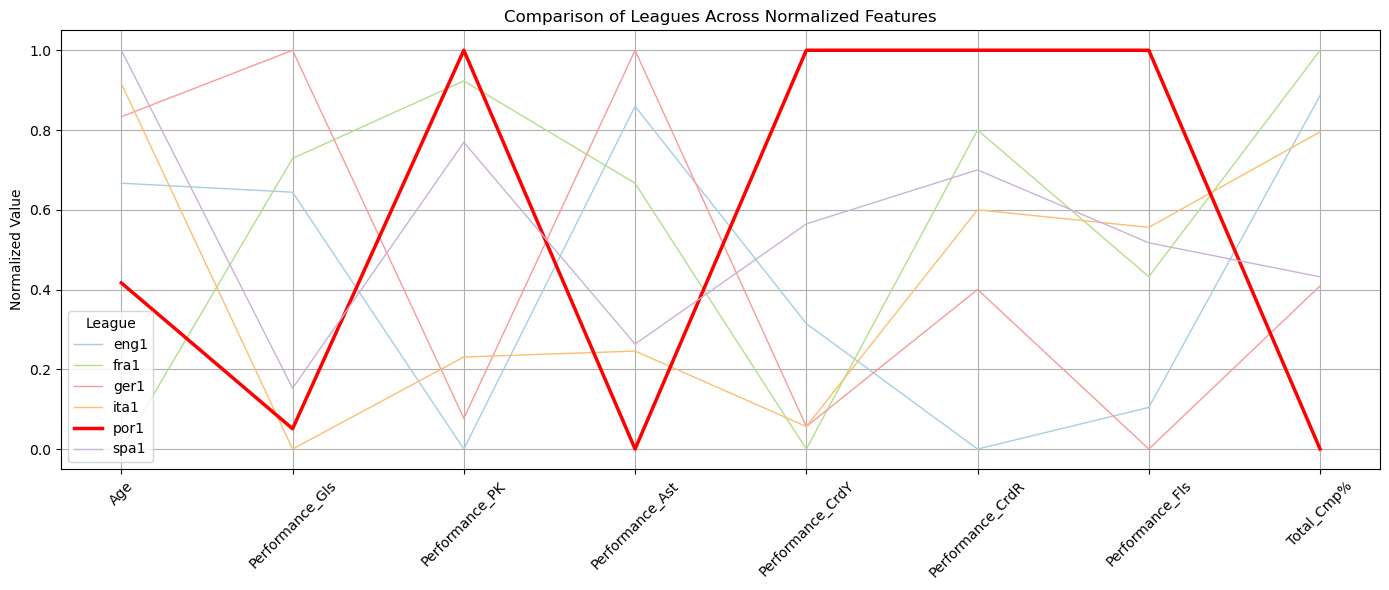

In [272]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Normalize numeric columns for parallel coordinates
features = summary_statistics.columns.difference(['League'])
scaler = MinMaxScaler()

por_bigfive_scaled = por_bigfive.copy()
por_bigfive_scaled [features] = scaler.fit_transform(por_bigfive[features])
por_bigfive_scaled.drop(['Playing Time_MP','Games Aprx','PK/Gls'], axis=1, inplace = True)

# Reset and transpose
df_plot = por_bigfive_scaled.reset_index()
df_plot_t = df_plot.set_index('League').T

# Define lighter colors for other leagues
light_colors = {
    'eng1': '#A6CEE3',
    'fra1': '#B2DF8A',
    'ger1': '#FB9A99',
    'ita1': '#FDBF6F',
    'spa1': '#CAB2D6',
}

plt.figure(figsize=(14, 6))

for league in df_plot_t.columns:
    if league == 'por1':
        plt.plot(df_plot_t.index, df_plot_t[league], label=league, color='red', linewidth=2.5)
    else:
        plt.plot(df_plot_t.index, df_plot_t[league], label=league, color=light_colors.get(league, 'gray'), linewidth=1)

plt.xticks(rotation=45)
plt.ylabel("Normalized Value")
plt.title("Comparison of Leagues Across Normalized Features")
plt.legend(title="League")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Search Similar Players

## 5.1. Mobile Striker

In [357]:
pip install requests beautifulsoup4 pandas fake_useragent

Note: you may need to restart the kernel to use updated packages.


In [396]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import pandas as pd
import time

def get_market_value(player_name):
    """
    Searches for 'player_name' in Transfermarket and returns his market value
    """
    base_url = "https://www.transfermarkt.pt/schnellsuche/ergebnis/schnellsuche"
    ua = UserAgent()

    headers = {
        'User-Agent': ua.random
    }

    params = {
        'query': player_name
    }

    try:
        response = requests.get(base_url, headers=headers, params=params)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')
        row = soup.select_one("table.items > tbody > tr")

        if not row:
            print(f"Nenhum resultado para: {player_name}")
            return None

        cells = row.select("td")
        
        # Procurar a primeira célula que contenha "M €"
        for cell in cells:
            text = cell.get_text(strip=True)
            if "M €" in text:
                time.sleep(1)  # sleep após sucesso para não ser bloqueado
                return text

        print(f"Valor de mercado não encontrado para: {player_name}")
        return None

    except Exception as e:
        print(f"Erro ao processar {player_name}: {e}")
        return None

In [416]:
# Similarity_Criteria per profile
Mobile_Striker = {
    'Performance_G-PK' : 0.20,
    'Performance_Ast' : 0.20,
    'Standard_Sh/90' : 0.20,
    'Standard_G/Sh' : 0.20,
    'Carries_PrgC' : 0.20
}

In [418]:
from sklearn.preprocessing import MinMaxScaler

def mobile_striker_finder(df, target=None, n=None):
    """
    Finds the most similar 'mobile strikers' to a target player using scaled data,
    but returns their original (unscaled) information.

    Parameters:
    - df: DataFrame with original data (unscaled).
    - target: Name of the target player (string).
    - n: Number of similar players to return (int).

    Returns:
    - A DataFrame (unscaled) with all columns for the top 'n' most similar players,
      filtered to only those with 'FW' in the 'Pos' column.
    """
    # Check input validity
    if target not in df['Player'].values:
        raise ValueError("Target player not found in the dataframe.")

    # Identify numeric features to scale (excluding categorical ones)
    exclude_cols = ['League', 'Player', 'Nation', 'Pos', 'Squad']
    features_to_scale = df.columns.difference(exclude_cols)

    # Scale numeric data
    scaler = MinMaxScaler()
    df_scaled = df.copy()
    df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

    # Filter only players with 'FW' in position (ignore NaNs)
    eligible_scaled = df_scaled[df_scaled['Pos'].str.contains('FW', na=False)].copy()
    eligible_cleaned = df.loc[eligible_scaled.index]

    # Get target player info (scaled)
    target_row = df_scaled[df_scaled['Player'] == target].iloc[0]

    # Remove target from comparison set
    eligible_scaled = eligible_scaled[eligible_scaled['Player'] != target]
    eligible_cleaned = eligible_cleaned[eligible_cleaned['Player'] != target]

    # Calculate weighted Manhattan distance
    distances = []
    for idx, row in eligible_scaled.iterrows():
        distance = 0
        for feature, weight in Mobile_Striker.items():
            distance += weight * abs(row[feature] - target_row[feature])
        distances.append((idx, distance))

    # Sort by distance and keep top n
    distances.sort(key=lambda x: x[1])
    top_indices = [idx for idx, _ in distances[:n]]
    top_distances = {idx: dist for idx, dist in distances[:n]}

    # Get original (unscaled) player data
    result_df = eligible_cleaned.loc[top_indices].copy()

    # Add distance column and sort by it
    result_df['Distance'] = result_df.index.map(top_distances)
    result_df = result_df.sort_values(by='Distance', ascending=True).reset_index(drop=True)

    # Add market value using get_market_value function
    result_df['Market_Value'] = result_df['Player'].apply(get_market_value)
    
    # Reorder columns: move 'Distance' and 'Market_Value' after 'Born'
    cols = result_df.columns.tolist()
    if 'Born' in cols and 'Distance' in cols and 'Market_Value' in cols:
        born_idx = cols.index('Born')
        # Remove as duas colunas que vais reposicionar
        cols.remove('Distance')
        cols.remove('Market_Value')
        # Inserir as duas colunas seguidas logo após 'Born'
        cols[born_idx + 1:born_idx + 1] = ['Distance', 'Market_Value']
        result_df = result_df[cols]
    
    return result_df

In [420]:
gyokeres_similar = mobile_striker_finder (df_cleaned, target = 'Viktor Gyökeres', n=10)
gyokeres_similar

,League,Player,Nation,Pos,Squad,Age,Born,Distance,Market_Value,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Expected_xG,Expected_npxG,Expected_xAG,Expected_npxG+xAG,Progression_PrgC,Progression_PrgP,Progression_PrgR,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG,90s,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_FK,Standard_PK,Standard_PKatt,Expected_npxG/Sh,Expected_G-xG,Expected_np:G-xG,Performance_2CrdY,Performance_Fls,Performance_Fld,Performance_Off,Performance_Crs,Performance_Int,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,Medium_Cmp,Medium_Att,Medium_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,Ast,xAG,Expected_xA,Expected_A-xAG,KP,1/3,PPA,CrsPA,PrgP,Tackles_Tkl,Tackles_TklW,Tackles_Def 3rd,Tackles_Mid 3rd,Tackles_Att 3rd,Challenges_Tkl,Challenges_Att,Challenges_Tkl%,Challenges_Lost,Blocks,Blocks_Sh,Blocks_Pass,Int,Tkl+Int,Clr,Err,Touches,Touches_Def Pen,Touches_Def 3rd,Touches_Mid 3rd,Touches_Att 3rd,Touches_Att Pen,Touches_Live,Take-Ons_Att,Take-Ons_Succ,Take-Ons_Succ%,Take-Ons_Tkld,Take-Ons_Tkld%,Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR
0,eng1,Bryan Mbeumo,CMR,FW,Brentford,24.0,1999,0.098150,"55,00M €",38,38,3414,37.9,20,7,27,15,5,6,3,0,12.3,7.5,8.3,15.9,130.0,141.0,351.0,0.53,0.18,0.71,0.40,0.58,0.32,0.22,0.54,0.20,0.42,37.9,20.0,79.0,34.0,43.0,2.08,0.90,0.19,0.44,17.9,6.0,5.0,6.0,0.10,7.7,7.5,0,25,44,11,202,14,31,0,0,0,156.0,34.0,74.0,31.5,872.0,1319.0,66.1,13902.0,4325.0,476.0,602.0,79.1,313.0,441.0,71.0,68.0,183.0,37.2,7.0,8.3,9.3,-1.3,70.0,63.0,59.0,19.0,141.0,49.0,31.0,18.0,15.0,16.0,21.0,35.0,60.0,14.0,26.0,3.0,23.0,14.0,63.0,55.0,1.0,1781.0,62.0,246.0,567.0,998.0,168.0,1775.0,111.0,52.0,46.8,47.0,42.3,1077.0,6721.0,3519.0,130.0,69.0,75.0,106.0,47.0,1204.0,351.0
1,eng1,Alexander Isak,SWE,FW,Newcastle Utd,24.0,1999,0.118909,"120,00 M €",34,34,2756,30.6,23,6,29,19,4,4,1,0,20.3,17.2,4.3,21.6,83.0,88.0,217.0,0.75,0.20,0.95,0.62,0.82,0.66,0.14,0.81,0.56,0.70,30.6,23.0,95.0,41.0,43.2,3.10,1.34,0.20,0.46,14.5,3.0,4.0,4.0,0.18,2.7,1.8,0,27,14,20,16,3,5,1,0,0,55.0,26.0,55.0,32.1,519.0,689.0,75.3,7434.0,1644.0,306.0,364.0,84.1,163.0,207.0,78.7,26.0,42.0,61.9,6.0,4.3,3.6,1.7,41.0,35.0,31.0,1.0,88.0,12.0,5.0,2.0,3.0,7.0,5.0,15.0,33.3,10.0,18.0,2.0,16.0,3.0,15.0,17.0,1.0,1025.0,20.0,57.0,386.0,596.0,189.0,1021.0,91.0,42.0,46.2,47.0,51.6,615.0,3723.0,1861.0,83.0,42.0,43.0,66.0,55.0,740.0,217.0
2,eng1,Matheus Cunha,BRA,"MF,FW",Wolves,25.0,1999,0.125731,"60,00M €",33,29,2597,28.9,15,6,21,15,0,0,4,0,8.6,8.6,7.7,16.4,112.0,144.0,161.0,0.52,0.21,0.73,0.52,0.73,0.30,0.27,0.57,0.30,0.57,28.9,15.0,110.0,44.0,40.0,3.81,1.52,0.14,0.34,20.5,12.0,0.0,0.0,0.08,6.4,6.4,0,42,71,8,142,17,22,0,1,0,125.0,13.0,29.0,31.0,811.0,1133.0,71.6,12850.0,4384.0,460.0,539.0,85.3,228.0,300.0,76.0,87.0,197.0,44.2,6.0,7.7,5.3,-1.7,56.0,92.0,58.0,10.0,144.0,38.0,22.0,17.0,16.0,5.0,13.0,39.0,33.3,26.0,21.0,1.0,20.0,17.0,55.0,23.0,0.0,1561.0,23.0,181.0,695.0,733.0,133.0,1560.0,137.0,61.0,44.5,61.0,44.5,904.0,6724.0,3336.0,112.0,95.0,41.0,80.0,55.0,1056.0,161.0
3,eng1,Luis Díaz,COL,FW,Liverpool,27.0,1997,0.152381,"70,00M €",36,28,2399,26.7,13,5,18,13,0,0,2,0,12.0,12.0,5.0,17.1,108.0,110.0,293.0,0.49,0.19,0.68,0.49,0.68,0.45,0.19,0.64,0.45,0.64,26.7,13.0,71.0,30.0,42.3,2.66,1.13,0.18,0.43,13.4,0.0,0.0,0.0,0.17,1.0,1.0,0,48,31,10,32,7,26,2,0,0,105.0,13.0,38.0,25.5,736.0,874.0,84.2,11789.0,2533.0,394.0,445.0,88.5,

In [421]:
pavlidis_list = mobile_striker_finder (df_cleaned, target = 'Vangelis Pavlidis', n=10)
pavlidis_list

,League,Player,Nation,Pos,Squad,Age,Born,Distance,Market_Value,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Expected_xG,Expected_npxG,Expected_xAG,Expected_npxG+xAG,Progression_PrgC,Progression_PrgP,Progression_PrgR,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG,90s,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_FK,Standard_PK,Standard_PKatt,Expected_npxG/Sh,Expected_G-xG,Expected_np:G-xG,Performance_2CrdY,Performance_Fls,Performance_Fld,Performance_Off,Performance_Crs,Performance_Int,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,Medium_Cmp,Medium_Att,Medium_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,Ast,xAG,Expected_xA,Expected_A-xAG,KP,1/3,PPA,CrsPA,PrgP,Tackles_Tkl,Tackles_TklW,Tackles_Def 3rd,Tackles_Mid 3rd,Tackles_Att 3rd,Challenges_Tkl,Challenges_Att,Challenges_Tkl%,Challenges_Lost,Blocks,Blocks_Sh,Blocks_Pass,Int,Tkl+Int,Clr,Err,Touches,Touches_Def Pen,Touches_Def 3rd,Touches_Mid 3rd,Touches_Att 3rd,Touches_Att Pen,Touches_Live,Take-Ons_Att,Take-Ons_Succ,Take-Ons_Succ%,Take-Ons_Tkld,Take-Ons_Tkld%,Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR
0,ger1,Tim Kleindienst,GER,FW,Gladbach,28.0,1995,0.012130,"17,00M €",31,31,2737,30.4,16,7,23,15,1,2,5,1,13.6,11.9,6.2,18.0,45.0,63.0,145.0,0.53,0.23,0.76,0.49,0.72,0.45,0.20,0.65,0.39,0.59,30.4,16.0,73.0,36.0,49.3,2.40,1.18,0.21,0.42,12.9,0.0,1.0,2.0,0.16,2.4,3.1,1,75,25,23,16,12,15,2,1,0,74.0,149.0,123.0,54.8,466.0,765.0,60.9,6509.0,1615.0,282.0,409.0,68.9,138.0,216.0,63.9,24.0,43.0,55.8,7.0,6.2,4.0,0.8,29.0,30.0,22.0,1.0,63.0,30.0,15.0,6.0,15.0,9.0,10.0,35.0,28.6,25.0,45.0,9.0,36.0,12.0,42.0,66.0,1.0,1149.0,74.0,145.0,613.0,403.0,137.0,1147.0,37.0,14.0,37.8,23.0,62.2,545.0,2407.0,1024.0,45.0,21.0,24.0,82.0,42.0,797.0,145.0
1,eng1,Ollie Watkins,ENG,FW,Aston Villa,28.0,1995,0.039473,"40,00M €",38,31,2598,28.9,16,8,24,14,2,2,2,0,15.3,13.8,3.3,17.1,55.0,31.0,165.0,0.55,0.28,0.83,0.48,0.76,0.53,0.12,0.65,0.48,0.59,28.9,16.0,82.0,36.0,43.9,2.84,1.25,0.17,0.39,12.1,0.0,2.0,2.0,0.17,0.7,0.2,0,29,33,16,7,8,7,2,0,0,43.0,52.0,71.0,42.3,307.0,424.0,72.4,3915.0,656.0,192.0,246.0,78.0,85.0,110.0,77.3,9.0,13.0,69.2,8.0,3.3,2.1,4.7,24.0,12.0,13.0,0.0,31.0,10.0,7.0,0.0,6.0,4.0,3.0,11.0,27.3,8.0,11.0,3.0,8.0,8.0,18.0,15.0,2.0,695.0,18.0,50.0,248.0,407.0,168.0,693.0,41.0,10.0,24.4,27.0,65.9,409.0,2243.0,1125.0,55.0,21.0,38.0,60.0,50.0,552.0,165.0
2,ger1,Harry Kane,ENG,FW,Bayern Munich,31.0,1993,0.045245,"75,00 M €",31,28,2381,26.5,26,9,35,17,9,9,5,0,20.3,13.3,5.3,18.6,29.0,97.0,143.0,0.98,0.34,1.32,0.64,0.98,0.77,0.20,0.97,0.50,0.70,26.5,26.0,105.0,45.0,42.9,3.97,1.70,0.16,0.38,16.3,6.0,9.0,9.0,0.13,5.7,3.7,0,9,21,16,13,2,11,2,0,0,61.0,29.0,20.0,59.2,509.0,645.0,78.9,9141.0,2258.0,237.0,284.0,83.5,203.0,234.0,86.8,59.0,83.0,71.1,9.0,5.3,5.6,3.7,35.0,56.0,36.0,2.0,97.0,13.0,11.0,3.0,8.0,2.0,2.0,6.0,33.3,4.0,16.0,2.0,14.0,2.0,15.0,16.0,0.0,917.0,20.0,77.0,333.0,511.0,162.0,908.0,53.0,23.0,43.4,29.0,54.7,513.0,2260.0,954.0,29.0,19.0,21.0,41.0,22.0,716.0,143.0
3,ger1,Jonathan Burkardt,GER,FW,Mainz 05,24.0,2000,0.061481,"35,00M €",29,28,2109,23.4,18,2,20,16,2,2,0,0,14.8,13.2,3.1,16.3,32.0,42.0,157.0,0.77,0.09,0.85,0.68,0.77,0.63,0.13,0.76,0.56,0.70,23.4,18.0,70.0,28.0,40.0,2.99,1.19,0.23,0.57,13.6,0.0,2.0,2.0,0.19,3.2,2.8,0,23,24,11,27,1,8,1,0,0,73.0,20.0,85.0,19.0,379.0,523.0,72.5,6262.0,854.0,197.0,258.0,76.4,127.0,156.0,81.4,37.0,52.0,71.2,2.0,3.1,2.7,-1.